In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("C:\\Users\\dell\\Machine Learning Assignment\\26-Apr\\dataset.xlsx")
data

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,ae66feb9e4dc3a0,3,positive,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,17,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,4,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,c20c44766f28291,10,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
missing_values = data.isna().sum()/data.shape[0] #sum() to count the number of missing values in each column
#print(data.isnull().mean())                   #mean() to calculate the fraction of missing values in each column

# set the display options to show all columns
pd.set_option('display.max_columns', None) #Displays all columns in a dataframe, without truncation
pd.set_option('display.max_rows', None)    #Displays all rows in a dataframe, without truncation
pd.set_option('display.width', None)       #Displays the dataframe without line wrapping
pd.set_option('display.max_colwidth', -1)  #Displays all the text in each cell, without truncation

print(missing_values)

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Hematocrit                                               0.893161
Hemoglobin                                               0.893161
Platelets                                                0.893338
Mean platelet volume                                     0.893870
Red blood Cells                                          0.893338
Lymphocytes                                              0.893338
Mean corpuscular hemoglobin concentration (MCHC)         0.893338
Leukocytes                                               0.893338
Basophils                                                0.893338
Mean corpu

<ipython-input-3-0158dc318bde>:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)  #Displays all the text in each cell, without truncation


In [4]:
#Selects the columns with missing data between 86% and 90% and assigns them to a list called "blood"

blood = list(data.columns[(missing_values > 0.86) & (missing_values < 0.9)])
print(blood)

['Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ', 'Red blood Cells', 'Lymphocytes', 'Mean corpuscular hemoglobin concentration\xa0(MCHC)', 'Leukocytes', 'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils', 'Mean corpuscular volume (MCV)', 'Monocytes', 'Red blood cell distribution width (RDW)']


In [5]:
#Selecting columns with missing values greater than 70% and less than 80%

virus = list(data.columns[(missing_values > 0.7) & (missing_values < 0.8)])
print(virus)

['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B', 'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus', 'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae', 'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43', 'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus', 'Parainfluenza 2']


In [6]:
data = data[['SARS-Cov-2 exam result'] + blood + virus]

In [7]:
# Encode categorical variables

def encode(data): 
    encoder = {"not_detected": 0, "negative": 0, "detected": 1, "positive": 1}
    for column in data.select_dtypes(include=['object']):
        data.loc[:, column] = data[column].map(encoder)
    return data

In [8]:
# Impute missing values

def impute(data):
    data = data.fillna(data.median())
    return data

In [9]:
# Chain the two functions together
data = encode(data)
data = impute(data)


C:\Users\dell\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [10]:
X = data[blood + virus]
y = data['SARS-Cov-2 exam result']

In [11]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [12]:
# Apply SMOTE to balance class distribution

from imblearn.over_sampling import SMOTE

# Concatenate training and test sets
#X = np.concatenate([X_train_pca, X_test_pca], axis=0)
#y = np.concatenate([y_train, y_test], axis=0)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Print class distribution before and after SMOTE
print('Class distribution before SMOTE:', y_train.value_counts())
print('Class distribution after SMOTE:', y_resampled.value_counts())

Class distribution before SMOTE: 0    4068
1    447 
Name: SARS-Cov-2 exam result, dtype: int64
Class distribution after SMOTE: 0    4068
1    4068
Name: SARS-Cov-2 exam result, dtype: int64


Logistic Regression
Accuracy: 0.5895
Confusion matrix:
[[ 237  971]
 [  31 1202]]
F1 score: 0.5154
Recall score: 0.5895
Precision score: 0.7170
AUC score: 0.5855
--------------


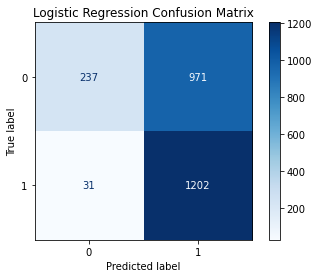

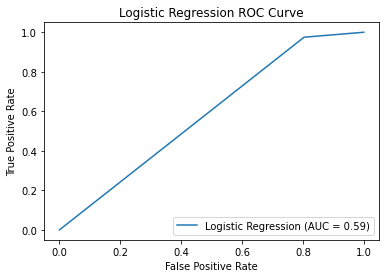

K Nearest Neighbors
Accuracy: 0.5412
Confusion matrix:
[[1146   62]
 [1058  175]]
F1 score: 0.4527
Recall score: 0.5412
Precision score: 0.6303
AUC score: 0.5453
--------------


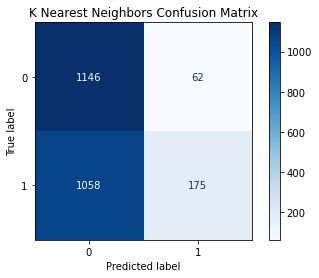

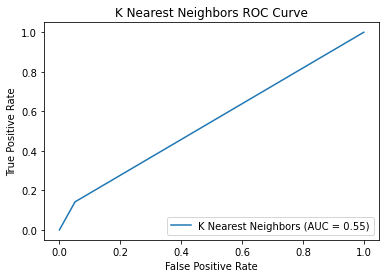

Decision Tree
Accuracy: 0.5928
Confusion matrix:
[[ 244  964]
 [  30 1203]]
F1 score: 0.5204
Recall score: 0.5928
Precision score: 0.7211
AUC score: 0.5888
--------------


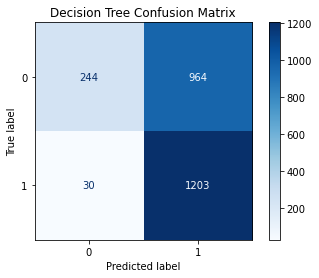

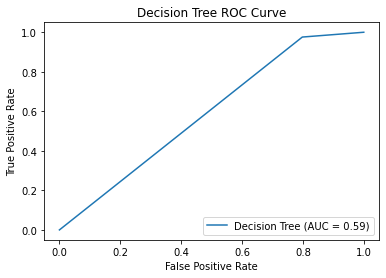

Random Forest
Accuracy: 0.5989
Confusion matrix:
[[ 250  958]
 [  21 1212]]
F1 score: 0.5271
Recall score: 0.5989
Precision score: 0.7387
AUC score: 0.5950
--------------


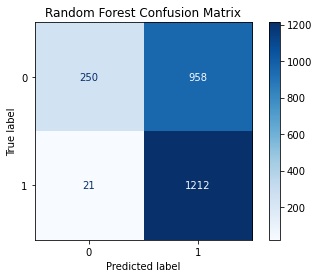

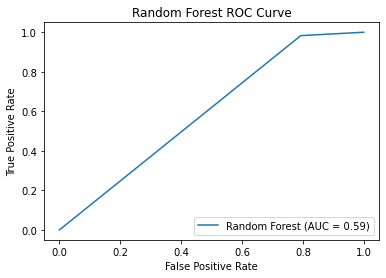

AdaBoost
Accuracy: 0.5969
Confusion matrix:
[[ 249  959]
 [  25 1208]]
F1 score: 0.5252
Recall score: 0.5969
Precision score: 0.7313
AUC score: 0.5929
--------------


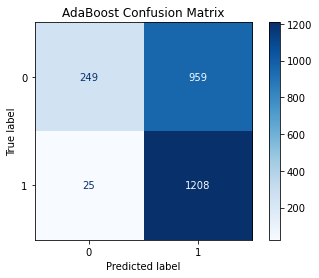

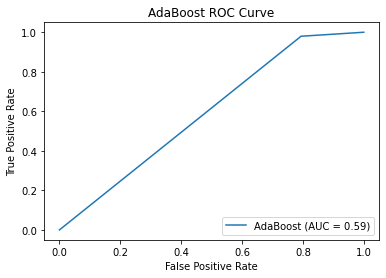

Gradient Boosting
Accuracy: 0.5973
Confusion matrix:
[[ 245  963]
 [  20 1213]]
F1 score: 0.5241
Recall score: 0.5973
Precision score: 0.7391
AUC score: 0.5933
--------------


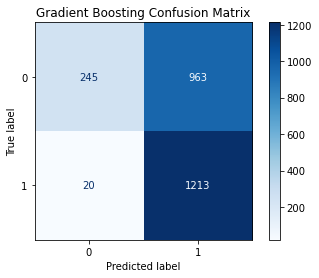

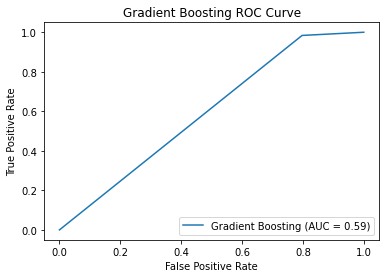

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay

# Resample test set using SMOTE
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Train and evaluate models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'K Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(DecisionTreeClassifier(random_state=42), random_state=42, learning_rate=0.1),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_resampled)
    acc = accuracy_score(y_test_resampled, y_pred)
    cm = confusion_matrix(y_test_resampled, y_pred)
    f1 = f1_score(y_test_resampled, y_pred, average='weighted')
    recall = recall_score(y_test_resampled, y_pred, average='weighted')
    precision = precision_score(y_test_resampled, y_pred, zero_division=0, average='weighted')
    roc_auc = roc_auc_score(y_test_resampled, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test_resampled, y_pred)
    print(name)
    print(f"Accuracy: {acc:.4f}")
    print(f"Confusion matrix:\n{cm}")
    print(f"F1 score: {f1:.4f}")
    print(f"Recall score: {recall:.4f}")
    print(f"Precision score: {precision:.4f}")
    print(f"AUC score: {roc_auc:.4f}")
    print("--------------")    
    
    # Plot confusion matrix
    ConfusionMatrixDisplay.from_estimator(model, X_test_resampled, y_test_resampled, cmap=plt.cm.Blues)
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    
    # Plot ROC curve
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=name)
    roc_display.plot()
    plt.title(f"{name} ROC Curve")
    plt.show()


In [14]:

# Train and evaluate models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'K Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(DecisionTreeClassifier(random_state=42), random_state=42, learning_rate=0.1),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Create empty lists to store results
model_names = []
accuracies = []
f1_scores = []
recalls = []
precisions = []

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_resampled)
    acc = accuracy_score(y_test_resampled, y_pred)
    cm = confusion_matrix(y_test_resampled, y_pred)
    f1 = f1_score(y_test_resampled, y_pred, average='weighted')
    recall = recall_score(y_test_resampled, y_pred, average='weighted')
    precision = precision_score(y_test_resampled, y_pred, zero_division=0, average='weighted')
    roc_auc = roc_auc_score(y_test_resampled, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test_resampled, y_pred)
    print(name)
    print(f"Accuracy: {acc:.4f}")
    print(f"Confusion matrix:\n{cm}")
    print(f"F1 score: {f1:.4f}")
    print(f"Recall score: {recall:.4f}")
    print(f"Precision score: {precision:.4f}")
    print(f"AUC score: {roc_auc:.4f}")
    print("--------------")    
    
    # Add results to lists
    model_names.append(name)
    accuracies.append(acc)
    f1_scores.append(f1)
    recalls.append(recall)
    precisions.append(precision)

# Create dataframe of results
results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'F1 Score': f1_scores,
    'Recall': recalls,
    'Precision': precisions
})

# Print results table
print(results_df)


Logistic Regression
Accuracy: 0.5895
Confusion matrix:
[[ 237  971]
 [  31 1202]]
F1 score: 0.5154
Recall score: 0.5895
Precision score: 0.7170
AUC score: 0.5855
--------------
K Nearest Neighbors
Accuracy: 0.5412
Confusion matrix:
[[1146   62]
 [1058  175]]
F1 score: 0.4527
Recall score: 0.5412
Precision score: 0.6303
AUC score: 0.5453
--------------
Decision Tree
Accuracy: 0.5928
Confusion matrix:
[[ 244  964]
 [  30 1203]]
F1 score: 0.5204
Recall score: 0.5928
Precision score: 0.7211
AUC score: 0.5888
--------------
Random Forest
Accuracy: 0.5989
Confusion matrix:
[[ 250  958]
 [  21 1212]]
F1 score: 0.5271
Recall score: 0.5989
Precision score: 0.7387
AUC score: 0.5950
--------------
AdaBoost
Accuracy: 0.5969
Confusion matrix:
[[ 249  959]
 [  25 1208]]
F1 score: 0.5252
Recall score: 0.5969
Precision score: 0.7313
AUC score: 0.5929
--------------
Gradient Boosting
Accuracy: 0.5973
Confusion matrix:
[[ 245  963]
 [  20 1213]]
F1 score: 0.5241
Recall score: 0.5973
Precision score: 0.7

In [15]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the random forest classifier
rfc = RandomForestClassifier(random_state=42)

# Instantiate the grid search
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters and the corresponding mean test score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Mean Test Score:", grid_search.best_score_)


Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best Mean Test Score: 0.5847234416154522


In [16]:
# Instantiate the random forest classifier with the best hyperparameters
rfc_final = RandomForestClassifier(n_estimators=150, max_depth=15, min_samples_split=2, min_samples_leaf=1, random_state=42)

# Fit the model to the resampled training data
rfc_final.fit(X_train_resampled, y_train_resampled)

# Predict the target variable on the test set
y_pred = rfc_final.predict(X_test)

# Print the accuracy score on the test set
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Accuracy Score: 0.27015057573073514
